In [154]:
import pandas as pd
import numpy as np
import requests
import datetime
from sklearn.externals import joblib
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from lifelines import KaplanMeierFitter


In [173]:
kmf = KaplanMeierFitter()

In [156]:
df = pd.read_excel('分析数据.xlsx')

In [157]:
df

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,flag
0,0,0,0,0,0,0,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,1,2,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12509,1,2,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12510,1,2,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12511,1,2,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df = df.fillna(2)
df

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,flag
0,0,0,0,0,0,0,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,0,0,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,0,0,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,0,0,0,0,0,0,1,1,1,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0,0,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
12509,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
12510,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
12511,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [159]:
df['flag'] = ""
for i in range(12512):
    l = df[i:i+1].values.tolist()
    if 1 in l[0]:
        df['flag'][i] = 1
    else:
        df['flag'][i] = 0

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [160]:
df['逾期发生最早期数'] = ""
for i in range(12512):
    l = df[i:i+1].values.tolist()
    if df['flag'][i] == 0:
        df['逾期发生最早期数'][i] = 0
    else:
        df['逾期发生最早期数'][i] = 1 + l[0].index(1)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [161]:
df['存活期数'] =""
for i in range(12512):
    df['存活期数'][i] = 72 - df["逾期发生最早期数"][i]
df

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,flag,逾期发生最早期数,存活期数
0,0,0,0,0,0,0,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
1,0,0,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
2,0,0,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
3,0,0,0,0,0,0,1,1,1,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,7,65
4,0,0,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,13,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12509,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12510,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12511,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71


In [162]:
df1 = df[0:12511]
df1

,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,flag,逾期发生最早期数,存活期数
0,0,0,0,0,0,0,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
1,0,0,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
2,0,0,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
3,0,0,0,0,0,0,1,1,1,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,7,65
4,0,0,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,13,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12506,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12507,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12508,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12509,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71


In [174]:
t = df1['逾期发生最早期数']
c = df1['flag']
kmf.fit(t,event_observed=c)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 12511 total observations, 3234 right-censored observations>

In [175]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,3234,0,3234,12511,12511
1,1438,1438,0,0,9277
2,1316,1316,0,0,7839
3,744,744,0,0,6523
4,511,511,0,0,5779
5,528,528,0,0,5268
6,662,662,0,0,4740
7,199,199,0,0,4078
8,413,413,0,0,3879


In [176]:
n = kmf.survival_function_

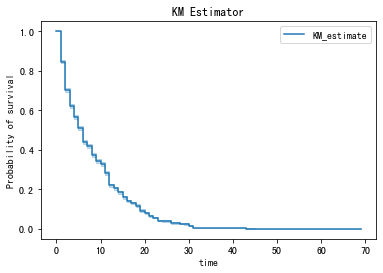

In [177]:
kmf.plot()
plt.title('KM Estimator')
plt.xlabel('time')
plt.ylabel('Probability of survival')
plt.savefig('KM Estimator.png')

In [167]:
kmf.median_survival_time_

6.0

In [168]:
kmf.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
1.0,0.837468,0.852201
2.0,0.693727,0.712321
3.0,0.612990,0.632713
4.0,0.557708,0.577867
5.0,0.500720,0.521063
6.0,0.429458,0.449656
7.0,0.408077,0.428149
8.0,0.363767,0.383453
9.0,0.334633,0.353968


In [178]:
kmf.predict([1])

0.8449929934245984

In [179]:
newdf2 = pd.DataFrame()
num = []
pod = []
for i in range(72):
    num.append(i+1)
    b = 1 - kmf.predict([i])
    pod.append(b)
newdf2['期数'] = num
newdf2['Predicted_pd'] = pod
newdf2

,期数,Predicted_pd
0,1,0.000000
1,2,0.155007
2,3,0.296863
3,4,0.377062
4,5,0.432144
...,...,...
67,68,0.999892
68,69,0.999892
69,70,1.000000
70,71,1.000000


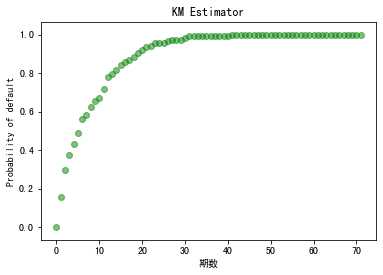

In [47]:
x = newdf2['期数']
y = newdf2['Predicted_pd']
plt.scatter(x, y, c="g", alpha=0.5)
plt.title('KM Estimator')
plt.xlabel('期数')
plt.ylabel('Probability of default')
plt.show()

In [196]:
newdf2

,期数,Predicted_pd,1-Real_pd,Real_pd
0,1,0.000000,1,0
1,2,0.155007,0.844993,0.155007
2,3,0.296863,0.64868,0.35132
3,4,0.377062,0.312094,0.687906
4,5,0.432144,-1.52615,2.52615
...,...,...,...,...
67,68,0.999892,1.0173,-0.0173032
68,69,0.999892,1.01701,-0.0170089
69,70,1.000000,1.01673,-0.0167263
70,71,1.000000,1.01645,-0.0164511


In [195]:
newdf2['1-Real_pd'] = ""
newdf2['Real_pd'] = ""
newdf2['Real_pd'][0] = 0
newdf2['1-Real_pd'][0] = 1
newdf2['Real_pd'][1] = newdf2['Predicted_pd'][1]
newdf2['1-Real_pd'][1] = 1-newdf2['Predicted_pd'][1]
for i in range(2,72):
    l = newdf2['1-Real_pd'][0:i].to_list()
    newdf2['Real_pd'][i] = newdf2['Predicted_pd'][i]/multiplyList(l)
    newdf2['1-Real_pd'][i] = 1- newdf2['Real_pd'][i]

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [197]:
newdf2.to_excel('read_pd.xlsx')

In [99]:
newdf2['Predicted_sur'] = 1-newdf2['Predicted_pd']

In [111]:
def multiplyList(myList) :
     
    # Multiply elements one by one
    result = 1
    for x in myList:
         result = result * x 
    return result 

,期数,Predicted_pd,1-Real_pd,Real_pd
0,1,0.000000,1,0
1,2,0.155007,0.844993,0.155007
2,3,0.296863,0.703137,0.296863
3,4,0.377062,0.55377,0.44623
4,5,0.432144,0.272663,0.727337
...,...,...,...,...
67,68,0.999892,1.01653,-0.0165335
68,69,0.999892,1.01626,-0.0162601
69,70,1.000000,1.016,-0.0159974
70,71,1.000000,1.01574,-0.0157414


In [126]:
l = newdf2['Predicted_real_pre_pd'][0:i-]
newdf2['Predicted_real_pre_pd'][i] = newdf2['Predicted_pd'][i]/multiplyList(l)

,期数,Predicted_pd,Predicted_sur,Predicted_real_pre_pd
0,1,0.000000,1.000000,0
1,2,0.155007,0.844993,0.155007
2,3,0.296863,0.703137,0.35132
3,4,0.377062,0.622938,0.634628
4,5,0.432144,0.567856,1.16759
...,...,...,...,...
67,68,0.999892,0.000108,1.83046e+133
68,69,0.999892,0.000108,1.69812e+137
69,70,1.000000,0.000000,1.57551e+141
70,71,1.000000,0.000000,inf


In [153]:
df

,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,flag,逾期发生最早期数,存活期数
0,0,0,0,0,0,0,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
1,0,0,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
2,0,0,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,72
3,0,0,0,0,0,0,1,1,1,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,7,65
4,0,0,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,13,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12509,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12510,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
12511,1,2,2,2,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,71
